# Problem & Background

Yangon also known as Rangoon is the largest city of Myanmar. With over 5 million people, Yangon is Myanmar's most populous city and its most important commercial centre. In this notebook, we will explore Yangon as a person who wants to start his supermarket business in an area where traffic is expected to be high with prospective clients nearby i.e. area or townships where restaurants, hotels etc. are densly located.

# Description of Data

To approach this problem, I would need following data:
- Townships in Yangon with their geographic locational info i.e. latitude and longitude values of townships
- Venues in each townships with their geographic locational info and venue types

I will be using following services to gather all those necessary data and explore or visualize the data:
- OpenCageGeocode to obtain latitudes and longitudes of each township in Yangon
- Foursquare API to obtain venue information in each township of Yangon

After collecting all the necessary data, I will be using a clustering machine learning technique - KMeans to form clusters of venues in Yangon to locate the area to open my supermarket business where related venues are densly located.

# Methodology

Following tasks will be performed:
- Importing Libraries
- Web Scraping & Data Collection
- Exploring data (EDA - Exploratory Data Analysis)
- Preprocessing of data
- Modelling & Analysis

# Import Libraries

In [1]:
pip install opencage

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install geocoder

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim
from opencage.geocoder import OpenCageGeocode

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans # import k-means from clustering stage


import folium # map rendering library

#visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from mpl_toolkits.mplot3d import Axes3D

print('Libraries imported.')

Libraries imported.


In [43]:
#credentials for opencate.geocoder API
KEY = 'API_KEY_HIDDEN'
geocoder = OpenCageGeocode(KEY)
print('Your credentails:')
print('API KEY:'+ KEY)

Your credentails:
API KEY:API_KEY_HIDDEN


In [44]:
CLIENT_ID = 'CLIENT_ID_HIDDEN' # your Foursquare ID
CLIENT_SECRET = 'CLIENT_SECRET_HIDDEN' # your Foursquare Secret
VERSION = '20180604'
limit = 20
print('Your credentails:')
print('CLIENT_ID:'+ CLIENT_ID)
print('CLIENT_SECRET:'+ CLIENT_SECRET)

Your credentails:
CLIENT_ID:CLIENT_ID_HIDDEN
CLIENT_SECRET:CLIENT_SECRET_HIDDEN


# Web Scraping & Data Collection

In [4]:
url = 'https://myanmars.net/postal-codes.html'
df_list = pd.read_html(url)

In [5]:
df_list

[                               0          1                            2
 0                       Township  Post Code                     မြို့နယ်
 1                         Ahlone      11121                         အလုံ
 2                          Bahan      11201                        ဗဟန်း
 3                     Botahtaung      11162                  ဗိုလ်တထောင်
 4                    Coco Island      11281                ကိုကိုးကျွန်း
 5                          Dagon      11191                         ဒဂုံ
 6           Dagon Myothit (East)      11421   ဒဂုံမြို့သစ် (အရှေ့ပိုင်း)
 7        Dagon Myothit (Seikkan)        NaN      ဒဂုံမြို့သစ် (ဆိပ်ကမ်း)
 8          Dagon Myothit (South)      11431  ဒဂုံမြို့သစ် (မြောက်ပိုင်း)
 9          Dagon Myothit (South)        NaN   ဒဂုံမြို့သစ် (တောင်ပိုင်း)
 10                          Dala        NaN                           ဒလ
 11                        Dawbon      11241                       ဒေါပုံ
 12                        Hlaing     

In [6]:
df = df_list[0]

In [7]:
df.shape

(57, 3)

We have 57 data points and 3 features

In [8]:
df.head(10)

,0,1,2
0,Township,Post Code,မြို့နယ်
1,Ahlone,11121,အလုံ
2,Bahan,11201,ဗဟန်း
3,Botahtaung,11162,ဗိုလ်တထောင်
4,Coco Island,11281,ကိုကိုးကျွန်း
5,Dagon,11191,ဒဂုံ
6,Dagon Myothit (East),11421,ဒဂုံမြို့သစ် (အရှေ့ပိုင်း)
7,Dagon Myothit (Seikkan),NaN,ဒဂုံမြို့သစ် (ဆိပ်ကမ်း)
8,Dagon Myothit (South),11431,ဒဂုံမြို့သစ် (မြောက်ပိုင်း)
9,Dagon Myothit (South),NaN,ဒဂုံမြို့သစ် (တောင်ပိုင်း)


In [9]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

In [10]:
df.head()

,Township,Post Code,မြို့နယ်
1,Ahlone,11121,အလုံ
2,Bahan,11201,ဗဟန်း
3,Botahtaung,11162,ဗိုလ်တထောင်
4,Coco Island,11281,ကိုကိုးကျွန်း
5,Dagon,11191,ဒဂုံ


In [11]:
del df['မြို့နယ်']

'မြို့နယ်' feature was deleted as it is the same as Township feature just in a Burmese language

# Exploratory Data Analysis (EDA) & Preprocessing of Data

In [12]:
df.describe(include = "all")

,Township,Post Code
count,56,41
unique,46,40
top,Pabedan,11401
freq,3,2


In [13]:
df.dtypes

0
Township     object
Post Code    object
dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 1 to 56
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Township   56 non-null     object
 1   Post Code  41 non-null     object
dtypes: object(2)
memory usage: 1.0+ KB


In [15]:
#output missing data
missing_data = df.isnull()
missing_data.head(10)

,Township,Post Code
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,True
8,False,False
9,False,True
10,False,True


In [16]:
print("Missing Data\n")
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

Missing Data

Township
False    56
Name: Township, dtype: int64

Post Code
False    41
True     15
Name: Post Code, dtype: int64



As we can see from above, we have 15 rows of data with missing post codes.

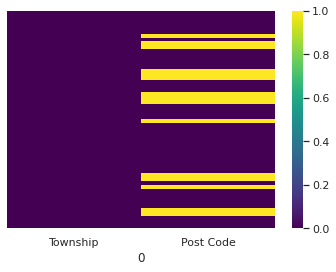

In [17]:
sns.heatmap(df.isnull(), yticklabels=False, cmap="viridis")

In [18]:
df

,Township,Post Code
1,Ahlone,11121
2,Bahan,11201
3,Botahtaung,11162
4,Coco Island,11281
5,Dagon,11191
6,Dagon Myothit (East),11421
7,Dagon Myothit (Seikkan),NaN
8,Dagon Myothit (South),11431
9,Dagon Myothit (South),NaN
10,Dala,NaN


My initial plan was to get the latitude and longitude values of townships using their post codes. But since I have townships with missing post codes, I will try an alternate way of getting latitude and longitude values using township names and increase my radius of search for venue on each township which hopefully will cover the whole township.

But first, we have one problem, we have a lot of townships with duplicate names. That is because some townships have more than 1 postal codes. Since we will be getting latitude and longitude values by township names, we can remove duplicate rows with same township names.

In [19]:
df = df.drop_duplicates(subset=['Township'], keep='first')
df.index = pd.RangeIndex(len(df.index))
df.index +=1

In [20]:
df.shape

(46, 2)

In [21]:
df

,Township,Post Code
1,Ahlone,11121
2,Bahan,11201
3,Botahtaung,11162
4,Coco Island,11281
5,Dagon,11191
6,Dagon Myothit (East),11421
7,Dagon Myothit (Seikkan),NaN
8,Dagon Myothit (South),11431
9,Dala,NaN
10,Dawbon,11241


Getting latitude and longitude values for each township using geocoder and township names.
First, lets check if all townships can retrieve latitude and longitude values.

In [25]:
for index, row in df.iterrows():
    query = row['Township']
    results = geocoder.geocode(query)
    if (bool(results)!=False):
        lat = results[0]['geometry']['lat']
        lng = results[0]['geometry']['lng']
        print(str(index) + " " + query + " - " + str(lat) + " : " + str(lng))
    else:
        print("This township throws an error. Check the township name and try again. Index - " + str(index) + " Township - " + query)

1 Ahlone - 16.786798 : 96.1287706
2 Bahan - 35.7871779 : 52.405549
3 Botahtaung - 16.7684905 : 96.1719706
4 Coco Island - 6.7324875 : 122.2573668
5 Dagon - 38.344636 : -120.9613296
6 Dagon Myothit (East) - 16.8549236 : 96.2232173
This township throws an error. Check the township name and try again. Index - 7 Township - Dagon Myothit (Seikkan)
8 Dagon Myothit (South) - 16.8549236 : 96.2232173
9 Dala - -11.033333 : 20.2
10 Dawbon - 16.7826249 : 96.1877755
11 Hlaing - 16.8430511 : 96.1234366
12 Hlaingtharya (East) - 16.8763811 : 96.0633373
13 Hlaingtharya (West) - 16.8763811 : 96.0633373
14 Hlegu - 17.0988371 : 96.2233619
15 Hmawbi - 17.1286759 : 96.0535465
16 Htantabin - 17.057555 : 95.8884469
17 Insein - 16.8879884 : 96.1066695
18 Kamayut - 16.8096175 : 96.1394114
19 Kawhmu - 16.5407694 : 96.109265
20 Kayan - 11.8301358 : -4.7375283
21 Kungyangon - 16.4391422 : 96.0103711
22 Kyauktada - 16.774106 : 96.1619839
23 Kyauktan - 16.6349752 : 96.3254567
24 Kyeemyindaing - 16.8129125 : 96.12130

As we can see from above, row 7 and row 29 - Dagon Myothit (Seikkan) and Mingalartaungnyunt townships are unable to retrieve the values. It could be due to spelling of the township names in English according to the Burmese pronounciation.
Since I am a burmese myself, I can substitute the english spelling for these townships in different ways. 

In [22]:
query = 'Dagon Seikkan'
results = geocoder.geocode(query)
results

[{'annotations': {'DMS': {'lat': "16° 50' 44.57724'' N",
    'lng': "96° 16' 33.35520'' E"},
   'MGRS': '47QKU0971364488',
   'Maidenhead': 'NK86du32cx',
   'Mercator': {'x': 10717387.726, 'y': 1890496.917},
   'OSM': {'edit_url': 'https://www.openstreetmap.org/edit?relation=5834770#map=16/16.84572/96.27593',
    'note_url': 'https://www.openstreetmap.org/note/new#map=16/16.84572/96.27593&layers=N',
    'url': 'https://www.openstreetmap.org/?mlat=16.84572&mlon=96.27593#map=16/16.84572/96.27593'},
   'UN_M49': {'regions': {'ASIA': '142',
     'MM': '104',
     'SOUTHEAST_ASIA': '035',
     'WORLD': '001'},
    'statistical_groupings': ['LDC', 'LEDC']},
   'callingcode': 95,
   'currency': {'alternate_symbols': [],
    'decimal_mark': '.',
    'disambiguate_symbol': 'MMK',
    'html_entity': '',
    'iso_code': 'MMK',
    'iso_numeric': '104',
    'name': 'Myanmar Kyat',
    'smallest_denomination': 50,
    'subunit': 'Pya',
    'subunit_to_unit': 100,
    'symbol': 'K',
    'symbol_firs

In [23]:
query = 'Mingalar Taungnyunt'
results = geocoder.geocode(query)
results

[{'annotations': {'DMS': {'lat': "16° 47' 6.17784'' N",
    'lng': "96° 9' 45.14976'' E"},
   'MGRS': '47QJU9752557940',
   'Maidenhead': 'NK86bs98mj',
   'Mercator': {'x': 10704765.167, 'y': 1883485.194},
   'OSM': {'edit_url': 'https://www.openstreetmap.org/edit?way=265907613#map=16/16.78505/96.16254',
    'note_url': 'https://www.openstreetmap.org/note/new#map=16/16.78505/96.16254&layers=N',
    'url': 'https://www.openstreetmap.org/?mlat=16.78505&mlon=96.16254#map=16/16.78505/96.16254'},
   'UN_M49': {'regions': {'ASIA': '142',
     'MM': '104',
     'SOUTHEAST_ASIA': '035',
     'WORLD': '001'},
    'statistical_groupings': ['LDC', 'LEDC']},
   'callingcode': 95,
   'currency': {'alternate_symbols': [],
    'decimal_mark': '.',
    'disambiguate_symbol': 'MMK',
    'html_entity': '',
    'iso_code': 'MMK',
    'iso_numeric': '104',
    'name': 'Myanmar Kyat',
    'smallest_denomination': 50,
    'subunit': 'Pya',
    'subunit_to_unit': 100,
    'symbol': 'K',
    'symbol_first': 0

So we found the correct spelling that is searchable for these townships. Lets update the dataframe.

In [24]:
df.at[7, 'Township'] = 'Dagon Seikkan'
df.at[29, 'Township'] = 'Mingalar Taungnyunt'

In [25]:
df

,Township,Post Code
1,Ahlone,11121
2,Bahan,11201
3,Botahtaung,11162
4,Coco Island,11281
5,Dagon,11191
6,Dagon Myothit (East),11421
7,Dagon Seikkan,NaN
8,Dagon Myothit (South),11431
9,Dala,NaN
10,Dawbon,11241


Lets get the latitude and longitude values for the townships again and update the dataframe.

In [27]:
for index, row in df.iterrows():
    query = row['Township']
    results = geocoder.geocode(query)
    if (bool(results)!=False):
        lat = results[0]['geometry']['lat']
        lng = results[0]['geometry']['lng']
        df.at[index, 'Latitude'] = lat
        df.at[index, 'Longitude'] = lng
    else:
        print("This township throws an error. Check the township name and try again. Index - " + str(index) + " Township - " + query)
        
print("Latitude & Longitude values retrieval done!")

Latitude & Longitude values retrieval done!


In [28]:
df

,Township,Post Code,Latitude,Longitude
1,Ahlone,11121,16.786798,96.128771
2,Bahan,11201,35.787178,52.405549
3,Botahtaung,11162,16.768490,96.171971
4,Coco Island,11281,6.732488,122.257367
5,Dagon,11191,38.344636,-120.961330
6,Dagon Myothit (East),11421,16.854924,96.223217
7,Dagon Seikkan,NaN,16.845716,96.275932
8,Dagon Myothit (South),11431,16.854924,96.223217
9,Dala,NaN,-11.033333,20.200000
10,Dawbon,11241,16.782625,96.187776


Creating a function that will use Foursquare API to retrieve venue information in each township. I will use a 1km raidus value.

In [29]:
def getNearbyVenues(townships, postalcodes, latitudes,longitudes, radius=1000):
    
    venues_list=[]
    for township, postalcode, lat, lng in zip(townships,postalcodes,latitudes,longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            township,
            postalcode,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        print("Venue retrieval done for " + township + " (" + str(postalcode) + ")")

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Township',
                  'Township Postal Code',
                  'Township Latitude', 
                  'Township Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    nearby_venues.index +=1
    
    return(nearby_venues)

In [30]:
yangon_venues = getNearbyVenues(townships=df['Township'], postalcodes=df['Post Code'], latitudes=df['Latitude'], longitudes=df['Longitude'])

Venue retrieval done for Ahlone (11121)
Venue retrieval done for Bahan (11201)
Venue retrieval done for Botahtaung (11162)
Venue retrieval done for Coco Island (11281)
Venue retrieval done for Dagon (11191)
Venue retrieval done for Dagon Myothit (East) (11421)
Venue retrieval done for Dagon Seikkan (nan)
Venue retrieval done for Dagon Myothit (South) (11431)
Venue retrieval done for Dala (nan)
Venue retrieval done for Dawbon (11241)
Venue retrieval done for Hlaing (11051)
Venue retrieval done for Hlaingtharya (East) (11401)
Venue retrieval done for Hlaingtharya (West) (11401)
Venue retrieval done for Hlegu (nan)
Venue retrieval done for Hmawbi (nan)
Venue retrieval done for Htantabin (nan)
Venue retrieval done for Insein (11012)
Venue retrieval done for Kamayut (11041)
Venue retrieval done for Kawhmu (nan)
Venue retrieval done for Kayan (nan)
Venue retrieval done for Kungyangon (nan)
Venue retrieval done for Kyauktada (11182)
Venue retrieval done for Kyauktan (11301)
Venue retrieval do

In [31]:
yangon_venues

,Township,Township Postal Code,Township Latitude,Township Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Ahlone,11121,16.786798,96.128771,Lucky Seven Tea Shop,16.783131,96.133287,Café
2,Ahlone,11121,16.786798,96.128771,Kou Fu Restaurant,16.787631,96.133878,Chinese Restaurant
3,Ahlone,11121,16.786798,96.128771,Hotel Grand United (Ahlone Branch),16.784748,96.135126,Hotel
4,Ahlone,11121,16.786798,96.128771,Padonmar Restaurant,16.789424,96.136582,Thai Restaurant
5,Ahlone,11121,16.786798,96.128771,Myanmar Book Center,16.790423,96.132991,Bookstore
6,Ahlone,11121,16.786798,96.128771,Western Park Ruby,16.779973,96.133672,Asian Restaurant
7,Ahlone,11121,16.786798,96.128771,Coca Suki,16.790966,96.123282,Asian Restaurant
8,Ahlone,11121,16.786798,96.128771,Lotaya Restaurant,16.788886,96.127490,Restaurant
9,Ahlone,11121,16.786798,96.128771,Cafe Jasper,16.790668,96.133756,Café
10,Ahlone,11121,16.786798,96.128771,Apple Hotpot & Dim Sum,16.786116,96.130737,Dim Sum Restaurant


In [32]:
len(yangon_venues['Venue Category'].unique())

66

We have 66 unique veneus in the dataframe.

In [33]:
yangon_venues['Venue Category'].value_counts()

Hotel                            32
Café                             27
Chinese Restaurant               23
Restaurant                       22
Bar                              13
Thai Restaurant                  13
Asian Restaurant                 12
Sushi Restaurant                 11
Hostel                           10
Shopping Mall                     9
Burmese Restaurant                8
Seafood Restaurant                6
Tea Room                          6
Noodle House                      6
Gift Shop                         6
Train Station                     6
Japanese Restaurant               6
Fast Food Restaurant              5
Breakfast Spot                    5
Park                              4
Ice Cream Shop                    4
BBQ Joint                         4
Market                            4
Dim Sum Restaurant                4
Video Store                       4
Department Store                  4
Bus Station                       4
Bakery                      

In [34]:
venuesCategories_by_township = yangon_venues.groupby('Township')['Venue Category'].nunique()

In [35]:
print(venuesCategories_by_township)

Township
Ahlone                          10
Botahtaung                      14
Dagon Myothit (East)             1
Dagon Myothit (South)            1
Dawbon                           3
Hlaing                           6
Hlaingtharya (East)              4
Hlaingtharya (West)              4
Insein                           4
Kamayut                         13
Kyauktada                       14
Kyeemyindaing                    5
Lanmadaw                        17
Latha                           16
Mayangone                        6
Mingalar Taungnyunt             13
Mingalardon                      2
Okkalapa (North)                 3
Okkalapa (South)                 3
Pabedan                         16
Pazundaung                      15
Sanchaung                       16
Seikkan                         15
Shwe Pyi Thar                    1
Taikkyi                          1
Tamwe                           13
Tharkayta                        6
Thingangyun                      4
Yangon (Cen

As mentioned in the beginning, I am looking to open my supermarket business in an area where potential clients or high traffic venues like many restaurants, hotels and shopping malls are located.

In [36]:
potential_locations = yangon_venues.loc[yangon_venues['Venue Category'].str.contains("Restaurant") | yangon_venues['Venue Category'].str.contains("Shopping") | yangon_venues['Venue Category'].str.contains("Hostel") | yangon_venues['Venue Category'].str.contains("Hotel")]
potential_locations.index = pd.RangeIndex(len(potential_locations.index))
potential_locations.index +=1

In [37]:
potential_locations

,Township,Township Postal Code,Township Latitude,Township Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Ahlone,11121,16.786798,96.128771,Kou Fu Restaurant,16.787631,96.133878,Chinese Restaurant
2,Ahlone,11121,16.786798,96.128771,Hotel Grand United (Ahlone Branch),16.784748,96.135126,Hotel
3,Ahlone,11121,16.786798,96.128771,Padonmar Restaurant,16.789424,96.136582,Thai Restaurant
4,Ahlone,11121,16.786798,96.128771,Western Park Ruby,16.779973,96.133672,Asian Restaurant
5,Ahlone,11121,16.786798,96.128771,Coca Suki,16.790966,96.123282,Asian Restaurant
6,Ahlone,11121,16.786798,96.128771,Lotaya Restaurant,16.788886,96.127490,Restaurant
7,Ahlone,11121,16.786798,96.128771,Apple Hotpot & Dim Sum,16.786116,96.130737,Dim Sum Restaurant
8,Ahlone,11121,16.786798,96.128771,Jin Bao Restaurant,16.786076,96.134055,Seafood Restaurant
9,Ahlone,11121,16.786798,96.128771,Carpe Diem Restaurant,16.784971,96.135083,Restaurant
10,Ahlone,11121,16.786798,96.128771,Eugenia Café,16.789917,96.133280,Asian Restaurant


Plotting potential venue locations on map.

In [38]:
potential_location_map = folium.Map(location=[16.786798,96.128771],zoom_start=12)

for township,venue_lat,venue_lng in zip(potential_locations['Township'],potential_locations['Venue Latitude'],potential_locations['Venue Longitude']):
    label = '{}'.format(township)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [venue_lat,venue_lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(potential_location_map)
potential_location_map

# Modelling & Analysis

In [39]:
ygn_potential_location_clustering = potential_locations.drop(['Township','Township Postal Code','Township Latitude', 'Township Longitude', 'Venue', 'Venue Category'],1)

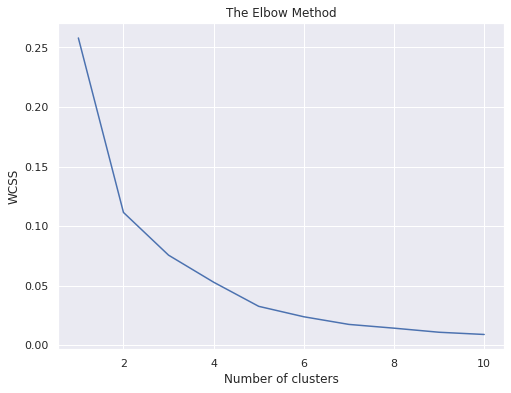

In [40]:
#try to find optimal k using the elbow method
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=12, random_state=0)
    kmeans.fit(ygn_potential_location_clustering)
    wcss.append(kmeans.inertia_)
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [41]:
k=5
kmeans = KMeans(n_clusters = k,random_state=0).fit(ygn_potential_location_clustering)
kmeans.labels_
potential_locations.insert(0, 'Cluster Labels', kmeans.labels_)

In [42]:
# create map
map_clusters = folium.Map(location=[16.786798,96.128771],zoom_start=12)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = ["grey", "green", "blue", "orange", "red"]
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for township, venue_lat, venue_lng, cluster in zip(potential_locations['Township'], potential_locations['Venue Latitude'], potential_locations['Venue Longitude'], potential_locations['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [venue_lat, venue_lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

From above, we can conclude that the best locations to open my supermarket are where grey clusters and yellow clusters are located i.e. Townships: "Sanchaung", "Ahlone", "Lanmadaw", "Latha", "Kyauktada", "Botahtaung".